# 🎓 Predictive Modeling of Student Academic Performance

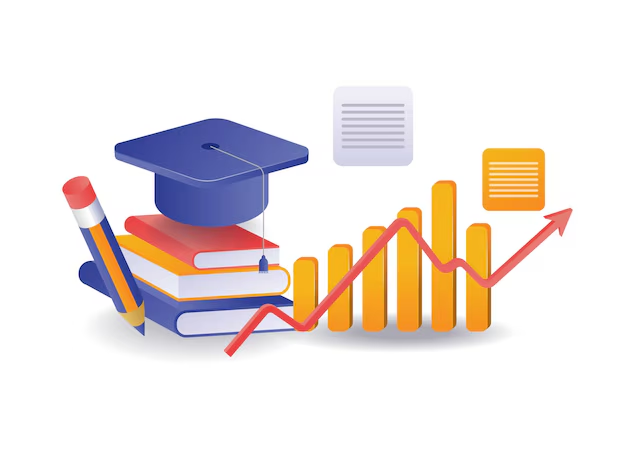


# Introduction

Ce projet vise à analyser et prédire les performances académiques d’élèves à partir d’un ensemble de facteurs démographiques, comportementaux et socio-économiques.  
À travers ce notebook, nous explorerons les variables influençant le **`Exam_Score`**, puis nous construirons plusieurs modèles de machine learning afin d’identifier les prédicteurs les plus pertinents.


Ce travail a pour objectif d’aider les enseignants, chercheurs et spécialistes de l’éducation à mieux comprendre les déterminants de la réussite scolaire et à proposer des pistes d’amélioration.


# About the Dataset

- **Nom du dataset :** Student Performance Factors  
- **Nombre d’élèves :** 6 607  
- **Objectif :** Comprendre comment les habitudes, l’environnement familial et le contexte socio-économique influencent la performance aux examens.


# Contenu du dataset

### Variable Description

Below is a brief explanation of each variable in the dataset, including what it represents and its measurement unit (when applicable).

#### Explanatory Variables (Features)

| Variable | Description | Type / Unit |
|---------|-------------|--------------|
| **Hours_Studied** | Number of hours spent studying per week | Numeric (hours) |
| **Attendance** | Percentage of classes attended | Numeric (%) |
| **Parental_Involvement** | Level of parental engagement in student's learning | Categorical (Low/Medium/High) |
| **Access_to_Resources** | Availability of learning resources (books, internet, materials…) | Categorical (Low/Medium/High) |
| **Extracurricular_Activities** | Participation in extracurricular clubs or sports | Categorical (Yes/No) |
| **Sleep_Hours** | Average number of sleeping hours per night | Numeric (hours) |
| **Previous_Scores** | Average score of previous academic assessments | Numeric (0–100) |
| **Motivation_Level** | Self-reported motivation toward studies | Categorical (Low/Medium/High) |
| **Internet_Access** | Whether the student has internet access at home | Categorical (Yes/No) |
| **Tutoring_Sessions** | Number of tutoring sessions per week | Numeric (count) |
| **Family_Income** | Socioeconomic income level of the family | Categorical (Low/Medium/High) |
| **Teacher_Quality** | Perceived teaching quality | Categorical (Low/Medium/High) |
| **School_Type** | Type of school attended | Categorical (Public/Private) |
| **Peer_Influence** | Impact of classmates on academic behavior | Categorical (Positive/Neutral/Negative) |
| **Physical_Activity** | Hours of physical exercise per week | Numeric (hours) |
| **Learning_Disabilities** | Whether the student has learning disabilities | Categorical (Yes/No) |
| **Parental_Education_Level** | Highest education level of parents | Categorical (High School/College/Postgraduate) |
| **Distance_from_Home** | Distance from home to school | Categorical (Near/Moderate/Far) |
| **Gender** | Gender of the student | Categorical (Male/Female) |

#### Dependent Variable (Target)

| Variable | Description | Type |
|---------|-------------|------|
| **Exam_Score** | Final exam score of the student | Numeric (0–100) |



---




# **1. Importation des librairies**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pximport plotly.subplots as sp
import plotly.subplots as sp
import plotly.graph_objects as go
from scipy import stats

#Tests statistiques
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import KFold


# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, RandomizedSearchCV
import time
from sklearn.model_selection import cross_val_score

# Display settings
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")


# **2. Chargement du dataset**

In [ ]:
df = pd.read_csv("/content/sample_data/StudentPerformanceFactors.csv")
df.head()



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#**3. Data Cleaning & Preprocessing**
- Gestion des valeurs manquantes  
- Correction des types de variables  
- Détection et gestion des outliers  
- Normalisation / standardisation (si nécessaire)

## **3.1.  Détection des valeurs manquantes (NaN)**
On inspecte les colonnes et le nombre de NaN pour chaque.

In [ ]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts>0]

,0
Parental_Education_Level,90
Teacher_Quality,78
Distance_from_Home,67


### Commentaire
*Identifier où il manque des valeurs permet de définir une stratégie d'imputation adaptée: numérique vs catégoriel vs ordinal.*

## **3.2 Imputation des NaN**
### **3.2.1 Classification automatique des types de variables**
On détecte:
- Variables numériques (int/float)
- Variables binaires (2 modalités)
- Variables ordinales (présence de niveaux Low/Medium/High ou listes ordonnées)
- Variables nominales (catégorielles sans ordre)

In [ ]:
# =============================
# 3. Définition des groupes de variables (corrigé)
# =============================
# Conventions de noms utilisées ensuite:
# numeric_vars, ordinal_vars, binary_vars, nominal_vars, target_col

target_col = 'Exam_Score'

# Variables numériques (hors cible)
numeric_vars = [c for c in df.select_dtypes(include=['int64','float64']).columns if c != target_col]

# Ordinal: niveaux avec ordre naturel
ordinal_mapping = {
    'Motivation_Level': ['Low','Medium','High'],
    'Parental_Involvement': ['Low','Medium','High'],
    'Teacher_Quality': ['Low','Medium','High'],
    'Distance_from_Home': ['Near','Moderate','Far'],
    'Parental_Education_Level': ['High School','College','Postgraduate'],
    'Family_Income': ['Low','Medium','High'],
    'Access_to_Resources': ['Low','Medium','High']
}
ordinal_vars = list(ordinal_mapping.keys())

# Binaires: deux modalités
binary_vars = ['Extracurricular_Activities','Internet_Access','Learning_Disabilities','Gender','School_Type']

# Nominal: pas d'ordre spécifique
nominal_vars = ['Peer_Influence']

print('Numeric vars:', numeric_vars)
print('Ordinal vars:', ordinal_vars)
print('Binary vars:', binary_vars)
print('Nominal vars:', nominal_vars)

Numeric vars: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
,Ordinal vars: ['Motivation_Level', 'Parental_Involvement', 'Teacher_Quality', 'Distance_from_Home', 'Parental_Education_Level', 'Family_Income', 'Access_to_Resources']
,Binary vars: ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities', 'Gender', 'School_Type']
,Nominal vars: ['Peer_Influence']


### **3.2.2 Imputation des NaN par type**
- Numérique: médiane (robuste aux outliers)
- Ordinal / Nominal / Binaire: mode (valeur la plus fréquente)

In [ ]:
# Imputation des NaN (convention noms corrigée)
df_imputed = df.copy()
# Numériques
for c in numeric_vars + [target_col]:
    if df_imputed[c].isna().any():
        df_imputed[c] = df_imputed[c].fillna(df_imputed[c].median())
# Catégorielles
for c in ordinal_vars + binary_vars + nominal_vars:
    if df_imputed[c].isna().any():
        df_imputed[c] = df_imputed[c].fillna(df_imputed[c].mode().iloc[0])

(df_imputed.isna().sum().sum(), 'NaN restants')

(np.int64(0), 'NaN restants')

## **3.3 Détection et Traitement des Outliers**

### **3.3.1 Détection des outliers avec la méthode IQR**
On applique la méthode IQR sur chaque variable numérique + la cible.
- IQR = Q3 - Q1
- Seuil bas = Q1 - 1.5×IQR
- Seuil haut = Q3 + 1.5×IQR

In [ ]:
# Détection des outliers (noms corrigés)
numeric_for_outlier = numeric_vars + [target_col]
outlier_report = []
for c in numeric_for_outlier:
    q1, q3 = df_imputed[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outliers = ((df_imputed[c] < low) | (df_imputed[c] > high)).sum()
    outlier_report.append({'Variable': c,'Q1': q1,'Q3': q3,'IQR': iqr,'Low_Thr': low,'High_Thr': high,'Outliers': outliers})
import pandas as pd
outlier_df = pd.DataFrame(outlier_report)
outlier_df

,Variable,Q1,Q3,IQR,Low_Thr,High_Thr,Outliers
0,Hours_Studied,16.0,24.0,8.0,4.0,36.0,43
1,Attendance,70.0,90.0,20.0,40.0,120.0,0
2,Sleep_Hours,6.0,8.0,2.0,3.0,11.0,0
3,Previous_Scores,63.0,88.0,25.0,25.5,125.5,0
4,Tutoring_Sessions,1.0,2.0,1.0,-0.5,3.5,430
5,Physical_Activity,2.0,4.0,2.0,-1.0,7.0,0
6,Exam_Score,65.0,69.0,4.0,59.0,75.0,104


### **3.3.2 Suppression des outliers extrêmes pour exam**

**Important :** Les outliers de `Exam_Score` sont conservés car :
1. Ce sont des notes réelles d'étudiants (pas des erreurs de saisie)
2. Les très bonnes notes (>95) représentent l'excellence académique
3. Les notes faibles (<40) reflètent des situations réelles de difficulté
4. Suppression des valeurs supérieurs a 100 pour les notes

In [ ]:
mask_exam = df_imputed['Exam_Score'] > 100
df_clean = df_imputed[~mask_exam ].reset_index(drop=True)



### **3.3.3 Visualisation des distributions après nettoyage**

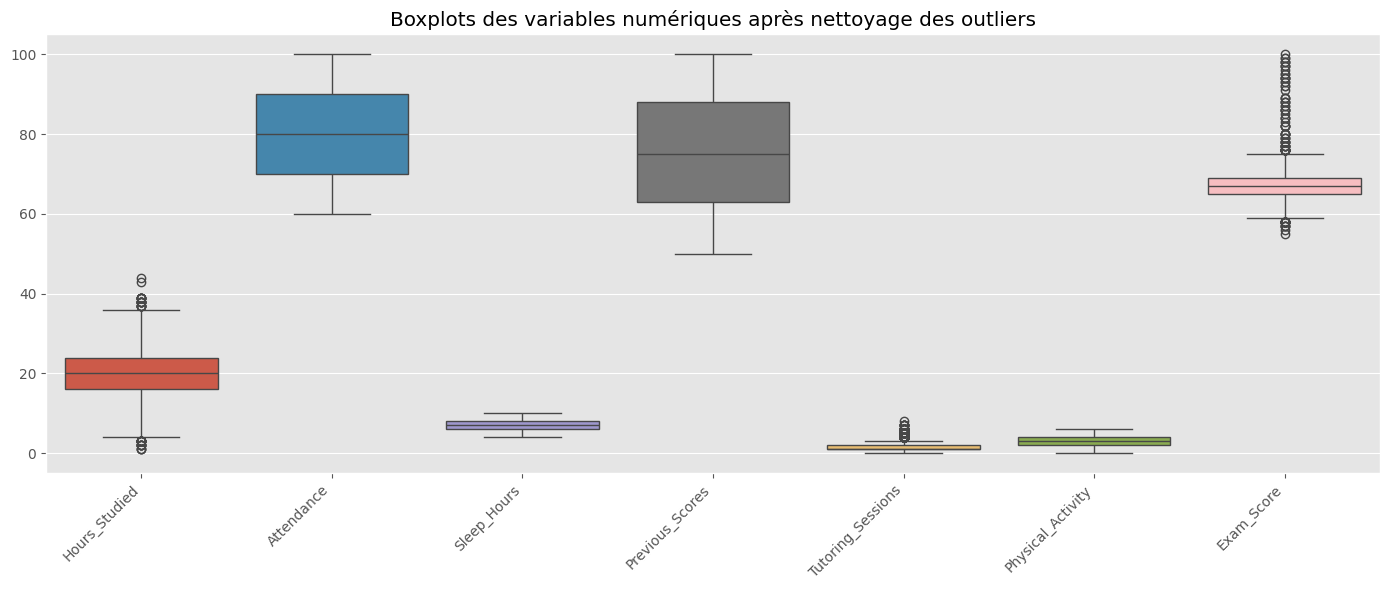

In [ ]:
# Visualisation boxplots après nettoyage des outliers
numeric_for_outlier = numeric_vars + [target_col]
plt.figure(figsize=(14,6))
sns.boxplot(data=df_clean[numeric_for_outlier])
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots des variables numériques après nettoyage des outliers')
plt.tight_layout()
plt.show()

 # **4. Exploratory Data Analysis (EDA)**

## **4.1 Analyse univariée**
- Comprendre individuellement chaque variable pour voir la distribution, les extrêmes, les comportements atypiques, les groupes dominants / minoritaires.


### **4.1.1 Variables numériques**

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculer le nombre de lignes et colonnes pour les subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Créer les subplots
fig = sp.make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[f"Distribution of {col}" for col in numeric_cols],
    vertical_spacing=0.1,
    horizontal_spacing=0.08
)

# Ajouter chaque histogramme
for idx, col in enumerate(numeric_cols):
    row = idx // n_cols + 1
    col_pos = idx % n_cols + 1

    fig.add_trace(
        go.Histogram(x=df[col], nbinsx=30, name=col, showlegend=False),
        row=row,
        col=col_pos
    )

# Mise en forme
fig.update_layout(
    height=300 * n_rows,
    title_text="Distributions des variables numériques",
    template="plotly_white",
    showlegend=False
)

fig.show()


### **4.1.2 Variables catégorielles**

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Calculer le nombre de lignes et colonnes pour les subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Créer les subplots
fig = sp.make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[f"Count of categories — {col}" for col in categorical_cols],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# Ajouter chaque histogramme
for idx, col in enumerate(categorical_cols):
    row = idx // n_cols + 1
    col_pos = idx % n_cols + 1

    # Compter les valeurs pour chaque catégorie
    value_counts = df[col].value_counts()

    fig.add_trace(
        go.Bar(
            x=value_counts.index,
            y=value_counts.values,
            name=col,
            showlegend=False,
            marker=dict(color=px.colors.qualitative.Plotly[idx % len(px.colors.qualitative.Plotly)])
        ),
        row=row,
        col=col_pos
    )

# Mise en forme
fig.update_layout(
    height=300 * n_rows,
    title_text="Distribution des variables catégorielles",
    template="plotly_white",
    showlegend=False
)

fig.show()

## **4.2 Analyse bivariée**

Voir directement ce qui influence réellement



### **4.2.1  Variables numériques → Exam Score (Scatterplots)**

In [ ]:
# Exclure Exam_Score de la liste
plot_cols = [col for col in numeric_cols if col != "Exam_Score"]

# Calculer le nombre de lignes et colonnes pour les subplots
n_cols = 3
n_rows = (len(plot_cols) + n_cols - 1) // n_cols

# Créer les subplots
fig = sp.make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[f"{col} vs Exam Score" for col in plot_cols],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# Ajouter chaque scatter plot avec trendline
for idx, col in enumerate(plot_cols):
    row = idx // n_cols + 1
    col_pos = idx % n_cols + 1

    # Supprimer les valeurs manquantes
    mask = df[[col, "Exam_Score"]].notna().all(axis=1)
    x_data = df.loc[mask, col]
    y_data = df.loc[mask, "Exam_Score"]

    # Ajouter le scatter plot
    fig.add_trace(
        go.Scatter(
            x=x_data,
            y=y_data,
            mode='markers',
            name=col,
            showlegend=False,
            marker=dict(size=5, opacity=0.6)
        ),
        row=row,
        col=col_pos
    )

    # Calculer et ajouter la ligne de tendance
    if len(x_data) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
        x_range = [x_data.min(), x_data.max()]
        y_range = [slope * x + intercept for x in x_range]

        fig.add_trace(
            go.Scatter(
                x=x_range,
                y=y_range,
                mode='lines',
                name='Trendline',
                showlegend=False,
                line=dict(color='red', dash='dash')
            ),
            row=row,
            col=col_pos
        )

# Mise en forme
fig.update_layout(
    height=300 * n_rows,
    title_text="Relations entre variables numériques et Exam Score",
    template="plotly_white",
    showlegend=False
)

# Mettre à jour les axes y pour tous les subplots
fig.update_yaxes(title_text="Exam Score")

fig.show()



### **4.2.2 Variable catégorielle → Exam Score (Boxplots)**

In [ ]:
# Calculer le nombre de lignes et colonnes pour les subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Créer les subplots
fig = sp.make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[f"Exam Score by {col}" for col in categorical_cols],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# Ajouter chaque box plot
for idx, col in enumerate(categorical_cols):
    row = idx // n_cols + 1
    col_pos = idx % n_cols + 1

    # Récupérer les catégories uniques
    categories = df[col].dropna().unique()

    for category in categories:
        mask = df[col] == category
        fig.add_trace(
            go.Box(
                y=df.loc[mask, "Exam_Score"],
                name=str(category),
                showlegend=False,
                marker=dict(opacity=0.7)
            ),
            row=row,
            col=col_pos
        )

# Mise en forme
fig.update_layout(
    height=300 * n_rows,
    title_text="Exam Score par variables catégorielles",
    template="plotly_white",
    showlegend=False
)

# Mettre à jour les axes y pour tous les subplots
fig.update_yaxes(title_text="Exam Score")

fig.show()

## **4.3 Les Tests statistiques (Pearson, T-Tests, Anova)**

On utilise des tests statistiques en plus des graphiques pour quantifier et confirmer la significativité des relations observées, au-delà de simples tendances visuelles.

In [ ]:
#Variables numériques
numeric_cols = [
    "Hours_Studied",
    "Attendance",
    "Sleep_Hours",
    "Previous_Scores",
    "Tutoring_Sessions",
    "Physical_Activity"
]

#Variables catégorielles binaires (2 modalités → t-test)

binary_cats = [
    "Extracurricular_Activities",
    "Internet_Access",
    "Learning_Disabilities",
    "Gender",
    "School_Type"
]

#Variables catégorielles multinomiales (3+ modalités → ANOVA)
multi_cats = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Motivation_Level",
    "Family_Income",
    "Teacher_Quality",
    "Peer_Influence",
    "Parental_Education_Level",
    "Distance_from_Home"
]


### **4.3.1 Test de corrélation (Pearson) - Variables numériques**

Mesurer si la relation entre  chaque variable numérique (StudyHours, Age, IQ…) et Exam_Score est :

- positive / négative
- forte ou faible
- statistiquement significative (p < 0.05)

In [ ]:
def test_correlation(df, numeric_col, target='Exam_Score'):
    r, p = pearsonr(df[numeric_col], df[target])
    display(pd.DataFrame({
        'Variable': [numeric_col],
        'Correlation (r)': [round(r, 3)],
        'p-value': [round(p, 4)],
        'Interpretation': [
            'Significant relationship' if p < 0.05 else 'Not significant'
        ]
    }))

for col in numeric_cols:
  test_correlation(df, col)


,Variable,Correlation (r),p-value,Interpretation
0,Hours_Studied,0.445,0.0,Significant relationship


,Variable,Correlation (r),p-value,Interpretation
0,Attendance,0.581,0.0,Significant relationship


,Variable,Correlation (r),p-value,Interpretation
0,Sleep_Hours,-0.017,0.1665,Not significant


,Variable,Correlation (r),p-value,Interpretation
0,Previous_Scores,0.175,0.0,Significant relationship


,Variable,Correlation (r),p-value,Interpretation
0,Tutoring_Sessions,0.157,0.0,Significant relationship


,Variable,Correlation (r),p-value,Interpretation
0,Physical_Activity,0.028,0.0237,Significant relationship


### **4.3.2 T-Test de Student**

- Est-ce que les deux groupes ont vraiment des moyennes différentes ?   

Ex : garçons vs filles ; Internet vs pas Internet.

In [ ]:
def test_ttest(df, cat_col, target='Exam_Score'):
    groups = df[cat_col].dropna().unique()
    g1, g2 = groups[0], groups[1]

    # T-statistic
    stat, p = ttest_ind(
        df[df[cat_col] == g1][target],
        df[df[cat_col] == g2][target],
        equal_var=False
    )

    # Result table
    display(pd.DataFrame({
        'Categorical Variable': [cat_col],
        'Category A': [g1],
        'Category B': [g2],
        f'{g1} Mean': [round(df[df[cat_col]==g1][target].mean(), 2)],
        f'{g2} Mean': [round(df[df[cat_col]==g2][target].mean(), 2)],
        'T-statistic': [round(stat, 3)],
        'p-value': [round(p, 4)],
        'Conclusion': [
            'Significant difference between groups'
            if p < 0.05 else
            'No significant difference between groups'
        ]
    }))

for col in binary_cats:
    test_ttest(df, col)



,Categorical Variable,Category A,Category B,No Mean,Yes Mean,T-statistic,p-value,Conclusion
0,Extracurricular_Activities,No,Yes,66.93,67.44,-5.283,0.0,Significant difference between groups


,Categorical Variable,Category A,Category B,Yes Mean,No Mean,T-statistic,p-value,Conclusion
0,Internet_Access,Yes,No,67.29,66.54,3.969,0.0001,Significant difference between groups


,Categorical Variable,Category A,Category B,No Mean,Yes Mean,T-statistic,p-value,Conclusion
0,Learning_Disabilities,No,Yes,67.35,66.27,6.648,0.0,Significant difference between groups


,Categorical Variable,Category A,Category B,Male Mean,Female Mean,T-statistic,p-value,Conclusion
0,Gender,Male,Female,67.23,67.24,-0.163,0.8703,No significant difference between groups


,Categorical Variable,Category A,Category B,Public Mean,Private Mean,T-statistic,p-value,Conclusion
0,School_Type,Public,Private,67.21,67.29,-0.723,0.4697,No significant difference between groups


## **4.4 Analyse des corrélations**

- Comprendre les relations structurelles du dataset.
- Identifier les variables les plus corrélées au score
- Repérer les variables qui mesurent la même chose (multicolinéarité)
- Repérer les clusters : socio-éco / comportement / performances

### **4.4.1 Heatmap**

In [ ]:
def plot_correlation_matrix(df):
    """
    Plot a rounded correlation matrix using a pastel color palette.
    Only numeric columns are used; others are ignored.
    """

    # ---- 1. Identify numeric columns ----
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    if len(numeric_cols) == 0:
        raise ValueError("Aucune colonne numérique trouvée dans le DataFrame.")

    # ---- 2. Compute correlation matrix ----
    corr = df[numeric_cols].corr()

    # ---- 3. Round values ----
    corr_rounded = corr.round(2)

    # ---- 4. Plot with Plotly ----
    fig = px.imshow(
        corr_rounded,
        text_auto=True,
        aspect="auto",
        title="Correlation Matrix (Rounded & Pastel)",
        template="plotly_white",
        color_continuous_scale=[
            "#d0e1f9",  # pastel blue
            "#4d648d",  # medium blue
            "#283655"   # strong navy
        ],
    )

    # ---- 5. Layout adjustments ----
    fig.update_layout(
        width=900,
        height=900,
        font=dict(size=12),
        title_font=dict(size=20),
        xaxis_title="",
        yaxis_title=""
    )

    fig.update_xaxes(side="bottom")


    return fig


In [ ]:
plot_correlation_matrix(df)


# **5. Feature Engineering & Encoding**

- Encodage des variables catégorielles (One-Hot, Ordinal…)  
- Création éventuelle de nouvelles variables  
- Scaling pour certains modèles (SVM, kNN…)

## **5.1 Encodage des Variables Catégorielles**

Les variables catégorielles doivent être transformées en valeurs numériques pour la modélisation.

### **5.1.1 Encodage ordinal**
Convertir les niveaux ordonnés (Low/Medium/High) en rangs numériques conservant l'ordre.

In [ ]:
# Encodage ordinal sur le dataset nettoyé
ordinal_maps = {
    'Parental_Involvement': {'Low':0,'Medium':1,'High':2},
    'Access_to_Resources': {'Low':0,'Medium':1,'High':2},
    'Motivation_Level': {'Low':0,'Medium':1,'High':2},
    'Family_Income': {'Low':0,'Medium':1,'High':2},
    'Teacher_Quality': {'Low':0,'Medium':1,'High':2},
    'Parental_Education_Level': {'High School':0,'College':1,'Postgraduate':2},
    'Distance_from_Home': {'Near':0,'Moderate':1,'Far':2},
}

df_encoded = df_clean.copy()
for c, mp in ordinal_maps.items():
    if c in df_encoded.columns:
        df_encoded[c] = df_encoded[c].map(mp)

df_encoded[list(ordinal_maps.keys())].head()

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,0,2,0,0,1,0,0
1,0,1,0,1,1,1,1
2,1,1,1,1,1,2,0
3,0,1,1,1,1,0,1
4,1,1,1,1,2,1,0


### **5.1.2 Encodage binaire**
Conversion Yes/No ou Male/Female vers 0/1.

In [ ]:
# Encodage binaire
binary_maps = {
    'Extracurricular_Activities': {'No':0,'Yes':1},
    'Internet_Access': {'No':0,'Yes':1},
    'Learning_Disabilities': {'No':0,'Yes':1},
    'Gender': {'Male':0,'Female':1},
    'School_Type': {'Public':0,'Private':1},
}

for c, mp in binary_maps.items():
    if c in df_encoded.columns:
        df_encoded[c] = df_encoded[c].map(mp)

df_encoded[list(binary_maps.keys())].head()

,Extracurricular_Activities,Internet_Access,Learning_Disabilities,Gender,School_Type
0,0,1,0,0,0
1,0,1,0,1,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,1,0


### **5.1.3 Encodage nominal (One-Hot Encoding)**
Pour les variables sans ordre naturel, avec `drop='first'` pour éviter la multicolinéarité.

In [ ]:
# Encodage nominal pour Peer_Influence avec One-Hot Encoding
if 'Peer_Influence' in df_encoded.columns:
    # One-Hot Encoding avec drop_first=True (supprime la première catégorie pour éviter multicolinéarité)
    peer_dummies = pd.get_dummies(df_encoded['Peer_Influence'], prefix='PeerInfluence', drop_first=True, dtype=int)
    df_final = pd.concat([df_encoded.drop(columns=['Peer_Influence']), peer_dummies], axis=1)
else:
    df_final = df_encoded.copy()

print('Colonnes PeerInfluence créées:', [c for c in df_final.columns if c.startswith('PeerInfluence_')])
print('Shape finale:', df_final.shape)
df_final.head()

Colonnes PeerInfluence créées: ['PeerInfluence_Neutral', 'PeerInfluence_Positive']
,Shape finale: (6606, 21)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,PeerInfluence_Neutral,PeerInfluence_Positive
0,23,84,0,2,0,7,73,0,1,0,...,1,0,3,0,0,0,0,67,0,1
1,19,64,0,1,0,8,59,0,1,2,...,1,0,4,0,1,1,1,61,0,0
2,24,98,1,1,1,7,91,1,1,2,...,1,0,4,0,2,0,0,74,1,0
3,29,89,0,1,1,8,98,1,1,1,...,1,0,4,0,0,1,0,71,0,0
4,19,92,1,1,1,6,65,1,1,3,...,2,0,4,0,1,0,1,70,1,0


In [ ]:
categorical_cols = ['Peer_Influence']  # ajouter ici toutes les colonnes restantes
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)


In [ ]:
# Liste des colonnes non numériques
non_numeric_cols = df_encoded.select_dtypes(include='object').columns
print(non_numeric_cols)


Index([], dtype='object')


# **5-bis. Clustering visualisation**

Le but du clustering est d'identifier des groupes d’élèves présentant des profils similaires afin de révéler des patterns cachés dans les données.
Le but est a aprtir de certains criteres, associer un profil d'eleve a un cluster.
ici pas possible car nos données n'ont pas de structure de clusters naturelle forte. C'est courant avec des données de performances étudiantes qui forment plutôt un continuum (faible → moyen → bon) qu'des groupes distincts.
On fera donc une simple :
- Analyse descriptive


In [ ]:
print(df_encoded.dtypes)


Hours_Studied                 int64
,Attendance                    int64
,Parental_Involvement          int64
,Access_to_Resources           int64
,Extracurricular_Activities    int64
,Sleep_Hours                   int64
,Previous_Scores               int64
,Motivation_Level              int64
,Internet_Access               int64
,Tutoring_Sessions             int64
,Family_Income                 int64
,Teacher_Quality               int64
,School_Type                   int64
,Physical_Activity             int64
,Learning_Disabilities         int64
,Parental_Education_Level      int64
,Distance_from_Home            int64
,Gender                        int64
,Exam_Score                    int64
,Peer_Influence_Neutral         bool
,Peer_Influence_Positive        bool
,dtype: object


In [ ]:
print(f"\n{'='*70}")
print("ANALYSE EXPLORATOIRE - STRUCTURE DES DONNÉES")
print(f"{'='*70}\n")
print("🔍 Objectif : Visualiser la structure des données pour détecter")
print("   l'existence éventuelle de groupes naturels d'étudiants.\n")

# 1. Statistiques descriptives générales
print(f"{'─'*70}")
print("📊 STATISTIQUES DESCRIPTIVES GÉNÉRALES")
print(f"{'─'*70}\n")

variables_cles = ['Exam_Score', 'Hours_Studied', 'Attendance', 'Previous_Scores',
                  'Sleep_Hours', 'Motivation_Level', 'Parental_Involvement',
                  'Access_to_Resources', 'Tutoring_Sessions', 'Physical_Activity']

stats_desc = df_encoded[variables_cles].describe().T
stats_desc['range'] = stats_desc['max'] - stats_desc['min']
print(stats_desc[['mean', 'std', 'min', 'max', 'range']].round(2))

print(f"\n{'='*70}\n")


,======================================================================
,ANALYSE EXPLORATOIRE - STRUCTURE DES DONNÉES
,======================================================================
,
,🔍 Objectif : Visualiser la structure des données pour détecter
,   l'existence éventuelle de groupes naturels d'étudiants.
,
,──────────────────────────────────────────────────────────────────────
,📊 STATISTIQUES DESCRIPTIVES GÉNÉRALES
,──────────────────────────────────────────────────────────────────────
,
,                       mean    std   min    max  range
,Exam_Score            67.23   3.87  55.0  100.0   45.0
,Hours_Studied         19.97   5.99   1.0   44.0   43.0
,Attendance            79.97  11.55  60.0  100.0   40.0
,Previous_Scores       75.07  14.40  50.0  100.0   50.0
,Sleep_Hours            7.03   1.47   4.0   10.0    6.0
,Motivation_Level       0.91   0.70   0.0    2.0    2.0
,Parental_Involvement   1.09   0.70   0.0    2.0    2.0
,Access_to_Resources    1.10   0.70   0.0    2.0

##


,======================================================================
,ANALYSE EXPLORATOIRE - EXISTE-T-IL DES GROUPES NATURELS ?
,======================================================================
,


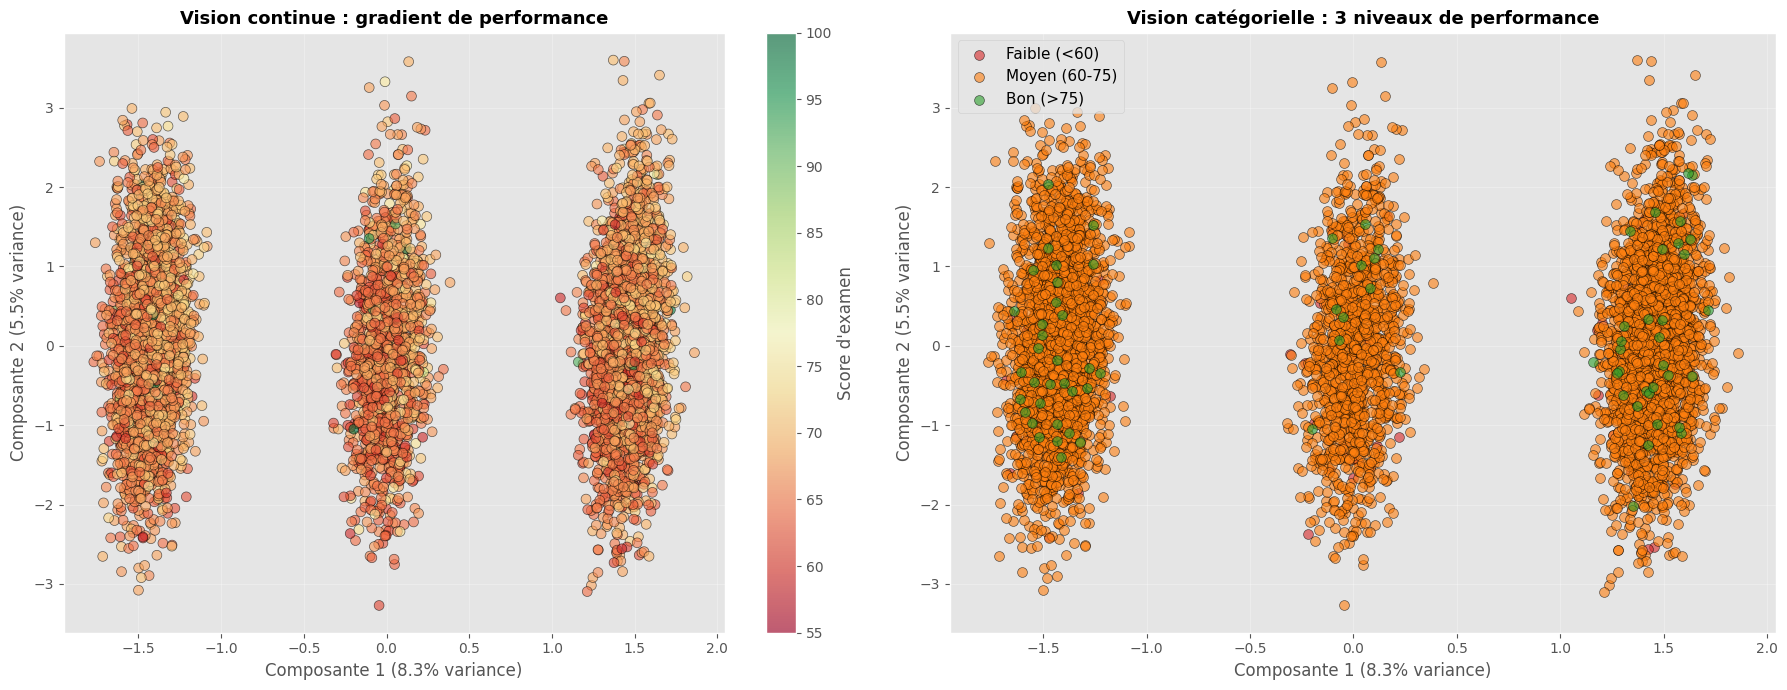


,📊 RÉSULTATS DE L'ANALYSE :
,
,──────────────────────────────────────────────────────────────────────
,Variance expliquée : 13.8% (2D)
,──────────────────────────────────────────────────────────────────────
,
,Répartition des étudiants par niveau de performance :
,Exam_Score
,Faible (<60)      145
,Moyen (60-75)    6386
,Bon (>75)          75
,Name: count, dtype: int64
,
,──────────────────────────────────────────────────────────────────────
,
,💡 INTERPRÉTATION :
,   • Graphique de gauche : montre un CONTINUUM avec un gradient de couleur
,     progressif (rouge→orange→vert), confirmant l'absence de groupes distincts
,   • Graphique de droite : montre un CHEVAUCHEMENT TOTAL des 3 catégories,
,     les couleurs sont complètement mélangées sans frontières claires
,   • Les 3 'colonnes' verticales visibles proviennent de variables catégorielles
,     encodées, pas de groupes naturels d'étudiants
,   • La variance expliquée en 2D (~15-20%) est faible, indiquant que la structure
,     des d

In [ ]:
print(f"\n{'='*70}")
print("ANALYSE EXPLORATOIRE - EXISTE-T-IL DES GROUPES NATURELS ?")
print(f"{'='*70}\n")

# Supprimer la colonne Performance_Category si elle existe déjà
if 'Performance_Category' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['Performance_Category'])

# Préparation des données
X = df_encoded.drop(columns=['Exam_Score'])  # Features
y = df_encoded['Exam_Score']                  # Target

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction en 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer 3 catégories de performance (variable temporaire)
performance_category = pd.cut(df_encoded['Exam_Score'],
                              bins=[0, 60, 75, 100],
                              labels=['Faible (<60)', 'Moyen (60-75)', 'Bon (>75)'])

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Graphique 1 : Distribution continue (score)
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1],
                          c=df_encoded['Exam_Score'],
                          cmap='RdYlGn',
                          alpha=0.6,
                          s=50,
                          edgecolors='black',
                          linewidths=0.5)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Score d\'examen', fontsize=12)
axes[0].set_xlabel(f'Composante 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
axes[0].set_ylabel(f'Composante 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
axes[0].set_title('Vision continue : gradient de performance', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Graphique 2 : Catégories de performance
colors_cat = {'Faible (<60)': '#d62728', 'Moyen (60-75)': '#ff7f0e', 'Bon (>75)': '#2ca02c'}
for category, color in colors_cat.items():
    mask = performance_category == category
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1],
                   c=color, label=category,
                   alpha=0.6, s=50, edgecolors='black', linewidths=0.5)

axes[1].set_xlabel(f'Composante 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
axes[1].set_ylabel(f'Composante 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
axes[1].set_title('Vision catégorielle : 3 niveaux de performance', fontsize=13, fontweight='bold')
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse des résultats
print(f"\n📊 RÉSULTATS DE L'ANALYSE :\n")
print(f"{'─'*70}")
print(f"Variance expliquée : {sum(pca.explained_variance_ratio_)*100:.1f}% (2D)")
print(f"{'─'*70}\n")

# Statistiques par catégorie
print("Répartition des étudiants par niveau de performance :")
print(performance_category.value_counts().sort_index())
print(f"\n{'─'*70}\n")

print("💡 INTERPRÉTATION :")
print("   • Graphique de gauche : montre un CONTINUUM avec un gradient de couleur")
print("     progressif (rouge→orange→vert), confirmant l'absence de groupes distincts")
print("   • Graphique de droite : montre un CHEVAUCHEMENT TOTAL des 3 catégories,")
print("     les couleurs sont complètement mélangées sans frontières claires")
print("   • Les 3 'colonnes' verticales visibles proviennent de variables catégorielles")
print("     encodées, pas de groupes naturels d'étudiants")
print("   • La variance expliquée en 2D (~15-20%) est faible, indiquant que la structure")
print("     des données est complexe et multidimensionnelle")
print(f"\n   ➡️  Conclusion : Les données forment un SPECTRE continu de performances")
print("      plutôt que des groupes naturellement distincts.")
print(f"\n   ➡️  Implication : Tout clustering K-means sera une SEGMENTATION ARTIFICIELLE")
print("      utile pour la description et la communication, mais ne reflète PAS")
print("      des groupes 'réels' présents naturellement dans les données.\n")
print(f"{'='*70}\n")

# **6. Split du dataset**
- Séparation en ensembles d’entraînement et de test  
- Option : ajout d’un validation set ou cross-validation

In [ ]:
features = [c for c in df_final.columns if c != target_col]
X = df_final[features].copy()
y = df_final[target_col].copy()

print(f"Nombre de features : {len(features)}")
print(f"Shape de X : {X.shape}")
print(f"Shape de y : {y.shape}")

Nombre de features : 20
,Shape de X : (6606, 20)
,Shape de y : (6606,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train : {X_train.shape}, Test : {X_test.shape}")

Train : (5284, 20), Test : (1322, 20)


# **7. Standardisation**

Pourquoi standardiser les variables numériques ?
La standardisation (centrer-réduire) consiste à transformer les variables pour qu'elles aient une moyenne de 0 et un écart-type de 1.
Cela permet :
- D'éviter que les variables à grande échelle dominent les modèles sensibles à l'échelle (KNN, SVR, régression linéaire, etc.)
- D'assurer une comparaison équitable entre toutes les variables numériques

In [ ]:
scale_cols = [c for c in X_train.columns if c in numeric_vars]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

print(f"Colonnes standardisées : {len(scale_cols)}")
print(X_train_scaled.head())

Colonnes standardisées : 6
,      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
,5936      -1.509761   -0.433104                     2                    2   
,4416      -2.012507   -0.606517                     1                    2   
,2948      -1.677343   -0.346398                     1                    0   
,3085      -0.001522    0.347251                     0                    0   
,5819      -0.001522   -1.560285                     1                    1   
,
,      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
,5936                           1     1.345705         0.136860   
,4416                           0     0.665320         0.206483   
,2948                           0    -2.056220        -0.489743   
,3085                           0    -0.015065        -0.072007   
,5819                           0    -2.056220         1.598934   
,
,      Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
,5936          

# 8. Modélisation et Cross-Validation

### 8.1 Qu'est-ce que la Cross-Validation (Validation Croisée) ?

**Problème** : Si on entraîne un modèle sur tout le jeu d'entraînement et qu'on l'évalue une seule fois, les résultats peuvent être biaisés par le hasard du découpage.

**Solution - K-Fold CV** :
1. On divise le jeu d'entraînement en **K sous-ensembles** (folds), par exemple K=5
2. On répète K fois :
   - **1 fold** = validation (pour tester)
   - **K-1 folds** = entraînement (pour apprendre)
3. On calcule la moyenne des métriques sur les K itérations

**Avantages** :
- ✅ Résultats plus robustes et fiables
- ✅ Réduit la variance liée à un seul découpage aléatoire
- ✅ Détecte mieux le sur-apprentissage (overfitting)

**Dans notre cas** : 5-Fold CV sur le jeu d'entraînement (80% des données)

### **8.2 Modèles testés** :

#### - 1. Linear Regression (Régression Linéaire)
#### - 2. Ridge Regression (Régularisation L2)

#### - 3. Elastic Net

#### - 4. Lasso

#### - 5. Random Forest (Forêt Aléatoire)

#### - 6. Gradient Boosting (Boosting Séquentiel)


### **8.3 Les Métriques d'Évaluation**

#### 1. MAE (Mean Absolute Error) - Erreur Absolue Moyenne

#### 2. RMSE (Root Mean Squared Error) - Racine de l'Erreur Quadratique Moyenne

#### 3. R² (Coefficient de Détermination)


In [ ]:


from sklearn.linear_model import Lasso, ElasticNet
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
 'LinearRegression': LinearRegression(),
 'Ridge': Ridge(random_state=42),
  'Elastic Net': ElasticNet(random_state=42),
  'Lasso': Lasso(random_state=42),
 'RandomForest': RandomForestRegressor(n_estimators=300, random_state=42),
 'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rows = []
for name, mdl in models.items():
    mae_list=[]; rmse_list=[]; r2_list=[]
    for tr_idx, val_idx in cv.split(X_train_scaled):
        X_tr = X_train_scaled.iloc[tr_idx]
        X_val = X_train_scaled.iloc[val_idx]
        y_tr = y_train.iloc[tr_idx]
        y_val = y_train.iloc[val_idx]
        mdl.fit(X_tr, y_tr)
        preds = mdl.predict(X_val)
        mae = mean_absolute_error(y_val, preds)
        rmse = mean_squared_error(y_val, preds)**0.5
        r2 = r2_score(y_val, preds)
        mae_list.append(mae); rmse_list.append(rmse); r2_list.append(r2)
    cv_rows.append({'Model': name,
                    'MAE_mean': np.mean(mae_list), 'MAE_std': np.std(mae_list),
                    'RMSE_mean': np.mean(rmse_list), 'RMSE_std': np.std(rmse_list),
                    'R2_mean': np.mean(r2_list), 'R2_std': np.std(r2_list)})
cv_results = pd.DataFrame(cv_rows).sort_values(by=['RMSE_mean','R2_mean'], ascending=[True, False])
cv_results

,Model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
1,Ridge,0.506419,0.065855,2.082291,0.400814,0.717019,0.073151
0,LinearRegression,0.506361,0.065881,2.082296,0.400812,0.717018,0.073150
5,GradientBoosting,0.861687,0.078831,2.243390,0.369689,0.672450,0.066987
4,RandomForest,1.161025,0.061534,2.410902,0.326923,0.622274,0.055013
2,Elastic Net,1.930583,0.081673,3.001602,0.306742,0.414287,0.046060
3,Lasso,1.966796,0.079499,3.034403,0.302968,0.401343,0.044287


### **8.4 Séléction du meilleur modèle après la cross validation** :

In [ ]:
best_model_name = cv_results.iloc[0]['Model']
print('Meilleur modèle CV:', best_model_name)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

Meilleur modèle CV: Ridge


Ridge(random_state=42)

## **9. Évaluation sur le Jeu de Test & Analyse des Métriques**

### 🎯 Objectif
Évaluer le meilleur modèle (sélectionné par CV) sur le jeu de test (20% des données jamais vues)

### 📊 Métriques Calculées
- **MAE** : Erreur absolue moyenne (en points d'examen)
- **RMSE** : Erreur quadratique (pénalise les grosses erreurs)
- **R²** : Part de variance expliquée (0 à 1)

### ⚠️ Pourquoi Train ET Test ?
- **Train** : Performance sur les données d'entraînement
- **Test** : Performance sur données jamais vues (vraie capacité de généralisation)
- **Gap** : Si Train >> Test → OVERFITTING détecté !

### Performance du Ridge :

In [ ]:
# Réentraînement meilleur modèle sur train complet (scalé) et évaluation test (noms corrigés)
best_model_name = cv_results.iloc[0]['Model']
print('Meilleur modèle CV:', best_model_name)
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)
# Train metrics
train_preds = best_model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, train_preds)
rmse_train = mean_squared_error(y_train, train_preds)**0.5
r2_train = r2_score(y_train, train_preds)
# Test metrics
test_preds = best_model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, test_preds)
rmse_test = mean_squared_error(y_test, test_preds)**0.5
r2_test = r2_score(y_test, test_preds)
print({'Train_MAE': mae_train, 'Train_RMSE': rmse_train, 'Train_R2': r2_train})
print({'Test_MAE': mae_test, 'Test_RMSE': rmse_test, 'Test_R2': r2_test})

Meilleur modèle CV: Ridge
,{'Train_MAE': 0.49957969784186046, 'Train_RMSE': 2.110241082426821, 'Train_R2': 0.7107024113755749}
,{'Test_MAE': 0.41078334976929937, 'Test_RMSE': 1.5179253733898201, 'Test_R2': 0.825766842255649}


##### Le R² du test est supérieur au R² du train : Overfitting

## **10. Hyperparameter tuning to maximize R² Cross validation** :

In [ ]:
# Grilles de paramètres optimisées
import time
from sklearn.model_selection import RandomizedSearchCV
param_grids = {
    'LinearRegression': {},

    'Ridge': {
        'alpha': [0.1, 1.0, 10.0, 50.0]
    },

    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'max_iter': [1000, 5000, 10000]
    },

    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'l1_ratio': [0.2, 0.5, 0.8, 1.0],  # 1.0 => Lasso
        'max_iter': [1000, 5000, 10000]
    },

    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [10, 20],
        'min_samples_leaf': [5, 10]
    },

    'GradientBoosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [10, 20]
    }
}

# Modèles de base
base_models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

# Tuning avec RandomizedSearchCV
best_models = {}
tuning_results = []

print("🔧 HYPERPARAMETER TUNING EN COURS...\n")

for name, model in base_models.items():
    print(f"   {name}...", end=" ")
    start_time = time.time()

    if param_grids[name]:
        search = RandomizedSearchCV(
            model,
            param_grids[name],
            n_iter=8,
            cv=3,
            scoring='r2',
            n_jobs=-1,
            random_state=42,
            verbose=0
        )
        search.fit(X_train_scaled, y_train)

        best_models[name] = search.best_estimator_
        best_params = search.best_params_
        cv_score = search.best_score_

    else:  # LinearRegression
        model.fit(X_train_scaled, y_train)
        best_models[name] = model
        best_params = "Pas d'hyperparamètres"

        cv = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = []
        for tr_idx, val_idx in cv.split(X_train_scaled):
            model.fit(X_train_scaled.iloc[tr_idx], y_train.iloc[tr_idx])
            preds = model.predict(X_train_scaled.iloc[val_idx])
            scores.append(r2_score(y_train.iloc[val_idx], preds))
        cv_score = np.mean(scores)

    elapsed = time.time() - start_time

    tuning_results.append({
        'Model': name,
        'Best_Params': str(best_params),
        'CV_Score': cv_score,
        'Time': f"{elapsed:.2f}s"
    })

    print(f"✅ R² CV: {cv_score:.4f}")

print("\n✅ Tuning terminé !")

🔧 HYPERPARAMETER TUNING EN COURS...
,
,   LinearRegression... ✅ R² CV: 0.7138
,   Ridge... ✅ R² CV: 0.7100
,   Lasso... ✅ R² CV: 0.7100
,   ElasticNet... ✅ R² CV: 0.7098
,   RandomForest... ✅ R² CV: 0.6266
,   GradientBoosting... ✅ R² CV: 0.6513
,
,✅ Tuning terminé !


In [ ]:
df_tuning = pd.DataFrame(tuning_results).sort_values('CV_Score', ascending=False)
display(df_tuning)


,Model,Best_Params,CV_Score,Time
0,LinearRegression,Pas d'hyperparamètres,0.713786,0.02s
2,Lasso,"{'max_iter': 1000, 'alpha': 0.001}",0.710047,0.18s
1,Ridge,{'alpha': 1.0},0.710026,2.29s
3,ElasticNet,"{'max_iter': 1000, 'l1_ratio': 0.2, 'alpha': 0...",0.709831,0.13s
5,GradientBoosting,"{'n_estimators': 100, 'min_samples_split': 10,...",0.651283,6.12s
4,RandomForest,"{'n_estimators': 200, 'min_samples_split': 10,...",0.626643,16.40s


## **11. Evaluation avec le test et Interprétation des Résultats**

In [ ]:
# Évaluation finale Train vs Test
final_results = []

for name, model in best_models.items():
    model.fit(X_train_scaled, y_train)

    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)

    final_results.append({
        'Model': name,
        'R2_Train': r2_score(y_train, train_preds),
        'R2_Test': r2_score(y_test, test_preds),
        'R2_Gap': r2_score(y_train, train_preds) - r2_score(y_test, test_preds),
        'RMSE_Train': mean_squared_error(y_train, train_preds)**0.5,
        'RMSE_Test': mean_squared_error(y_test, test_preds)**0.5,
        'MAE_Test': mean_absolute_error(y_test, test_preds)
    })

df_final = pd.DataFrame(final_results).sort_values('R2_Test', ascending=False)
df_final = df_final.merge(df_tuning[['Model', 'CV_Score']].rename(columns={'CV_Score': 'R2_CV'}), on='Model', how='left')
df_final = df_final[['Model', 'R2_Train', 'R2_CV', 'R2_Test', 'R2_Gap', 'RMSE_Train', 'RMSE_Test', 'MAE_Test']]

print("📊 ÉVALUATION TRAIN vs TEST :\n")
display(df_final.round(4))

📊 ÉVALUATION TRAIN vs TEST :
,


,Model,R2_Train,R2_CV,R2_Test,R2_Gap,RMSE_Train,RMSE_Test,MAE_Test
0,LinearRegression,0.7107,0.7138,0.8258,-0.1151,2.1102,1.5179,0.4107
1,Ridge,0.7107,0.7100,0.8258,-0.1151,2.1102,1.5179,0.4108
2,Lasso,0.7107,0.7100,0.8257,-0.1150,2.1103,1.5181,0.4111
3,ElasticNet,0.7104,0.7098,0.8251,-0.1148,2.1114,1.5206,0.4174
4,GradientBoosting,0.7880,0.6513,0.7634,0.0246,1.8064,1.7687,0.8432
5,RandomForest,0.7794,0.6266,0.7287,0.0507,1.8425,1.8941,1.0218


## **12. Diagnostic Overfitting** :

In [ ]:
# Diagnostic overfitting par modèle
print("🔍 DIAGNOSTIC OVERFITTING :\n")

for _, row in df_final.iterrows():
    gap = row['R2_Gap']

    if gap < 0:
        status = "⚠️ ANORMAL"
        desc = "Test > Train (situation suspecte)"
    elif gap < 0.05:
        status = "✅ EXCELLENT"
        desc = "Pas d'overfitting"
    elif gap < 0.10:
        status = "✅ BON"
        desc = "Overfitting minimal"
    elif gap < 0.15:
        status = "⚠️ MODÉRÉ"
        desc = "Overfitting notable"
    else:
        status = "❌ FORT"
        desc = "Overfitting important"

    print(f"{row['Model']:20} {status:15} | Écart: {gap:+.4f} - {desc}")


🔍 DIAGNOSTIC OVERFITTING :
,
,LinearRegression     ⚠️ ANORMAL      | Écart: -0.1151 - Test > Train (situation suspecte)
,Ridge                ⚠️ ANORMAL      | Écart: -0.1151 - Test > Train (situation suspecte)
,Lasso                ⚠️ ANORMAL      | Écart: -0.1150 - Test > Train (situation suspecte)
,ElasticNet           ⚠️ ANORMAL      | Écart: -0.1148 - Test > Train (situation suspecte)
,GradientBoosting     ✅ EXCELLENT     | Écart: +0.0246 - Pas d'overfitting
,RandomForest         ✅ BON           | Écart: +0.0507 - Overfitting minimal


In [ ]:
print("📋 SITUATION ACTUELLE :\n")
print("   • R² Test > R² Train pour : LinearRegression, Ridge, LASSO")
print("   • Cause probable : Test set trop petit ou distribution favorable")
print("   • GradientBoosting : Comportement normal (écart +0.025)")

📋 SITUATION ACTUELLE :
,
,   • R² Test > R² Train pour : LinearRegression, Ridge, LASSO
,   • Cause probable : Test set trop petit ou distribution favorable
,   • GradientBoosting : Comportement normal (écart +0.025)


## **13. Feature importance** :

### **13.1 Ridge coefficients** :

In [ ]:
# Coefficients Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    'Variable': X_train_scaled.columns,
    'Coefficient': ridge.coef_,
    'Abs_Coef': np.abs(ridge.coef_)
}).sort_values('Abs_Coef', ascending=False)

print("📌 COEFFICIENTS RIDGE (Top 8) :\n")
display(coef_df.head(8)[['Variable', 'Coefficient']])

📌 COEFFICIENTS RIDGE (Top 8) :
,


,Variable,Coefficient
1,Attendance,2.283947
0,Hours_Studied,1.742740
3,Access_to_Resources,1.046082
2,Parental_Involvement,1.015326
19,PeerInfluence_Positive,0.991677
8,Internet_Access,0.944970
14,Learning_Disabilities,-0.883627
6,Previous_Scores,0.703566


### 🔍 Interprétation des Coefficients Ridge

Les coefficients du modèle Ridge indiquent **l'impact de chaque variable** sur la prédiction de la note d'examen :

**Coefficients positifs (+)** : Une augmentation de la variable entraîne une augmentation de la note
- Plus le coefficient est élevé, plus l'impact est fort

**Coefficients négatifs (-)** : Une augmentation de la variable entraîne une diminution de la note

**Exemple d'interprétation** :
- Si `Hours_Studied` a un coefficient de +0.85 → 1 heure supplémentaire = +0.85 points d'examen (en moyenne)
- Si `Absences` a un coefficient de -1.2 → 1 absence supplémentaire = -1.2 points d'examen

Nuage de point Ridge :

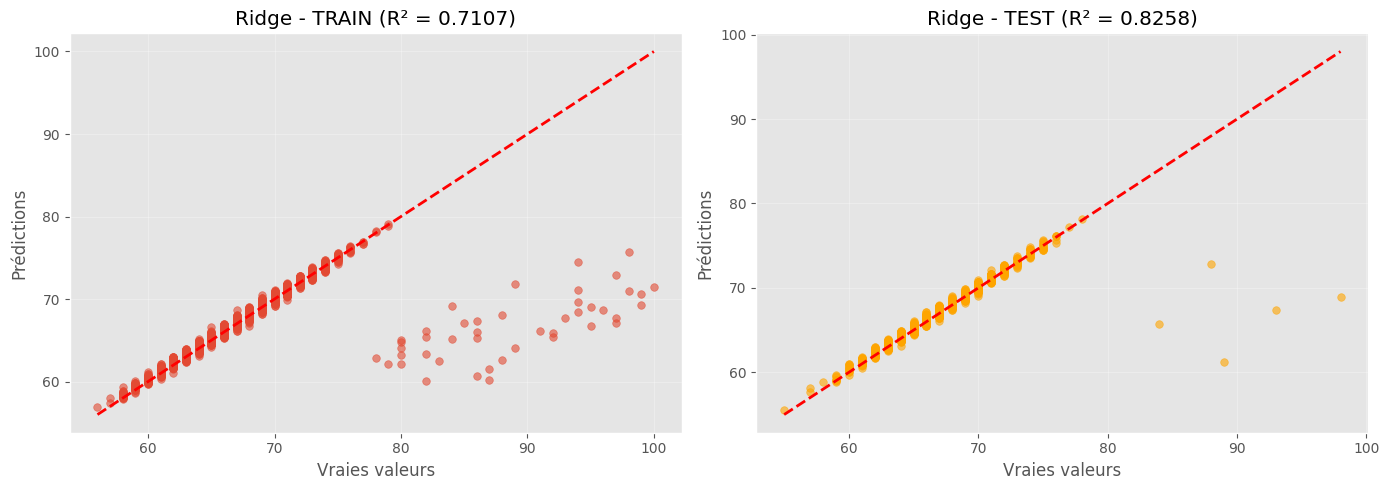

📊 RÉSULTATS RIDGE :
,   MAE Test : 0.41 points
,   RMSE Test : 1.52 points
,   R² Test : 0.8258


In [ ]:
# Visualisation Ridge : Prédictions vs Réalité
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)

train_preds_ridge = ridge.predict(X_train_scaled)
test_preds_ridge = ridge.predict(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train
axes[0].scatter(y_train, train_preds_ridge, alpha=0.6, s=30)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Vraies valeurs')
axes[0].set_ylabel('Prédictions')
axes[0].set_title(f'Ridge - TRAIN (R² = {r2_score(y_train, train_preds_ridge):.4f})')
axes[0].grid(True, alpha=0.3)

# Test
axes[1].scatter(y_test, test_preds_ridge, alpha=0.6, s=30, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Vraies valeurs')
axes[1].set_ylabel('Prédictions')
axes[1].set_title(f'Ridge - TEST (R² = {r2_score(y_test, test_preds_ridge):.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Métriques Ridge
print("📊 RÉSULTATS RIDGE :")
print(f"   MAE Test : {mean_absolute_error(y_test, test_preds_ridge):.2f} points")
print(f"   RMSE Test : {mean_squared_error(y_test, test_preds_ridge)**0.5:.2f} points")
print(f"   R² Test : {r2_score(y_test, test_preds_ridge):.4f}")

### **13.2 Gradient Boosting** :

In [ ]:
# Teste Gradient Boosting avec toutes les 20 features
gb_all = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, min_samples_split=10, random_state=42)
gb_all.fit(X_train_scaled, y_train)

train_preds_gb = gb_all.predict(X_train_scaled)
test_preds_gb = gb_all.predict(X_test_scaled)

# Métriques Gradient Boosting avec 20 features
r2_train_gb = r2_score(y_train, train_preds_gb)
r2_test_gb = r2_score(y_test, test_preds_gb)
rmse_test_gb = mean_squared_error(y_test, test_preds_gb)**0.5
mae_test_gb = mean_absolute_error(y_test, test_preds_gb)

print("📊 GRADIENT BOOSTING (20 features) :")
print(f"   R² Train : {r2_train_gb:.4f}")
print(f"   R² Test : {r2_test_gb:.4f}")
print(f"   Gap : {r2_train_gb - r2_test_gb:+.4f}")
print(f"   MAE Test : {mae_test_gb:.2f} points")
print(f"   RMSE Test : {rmse_test_gb:.2f} points")

📊 GRADIENT BOOSTING (20 features) :
,   R² Train : 0.7880
,   R² Test : 0.7634
,   Gap : +0.0246
,   MAE Test : 0.84 points
,   RMSE Test : 1.77 points


⭐ FEATURE IMPORTANCE - GRADIENT BOOSTING (Top 8) :
,


,Variable,Importance
1,Attendance,0.444147
0,Hours_Studied,0.272781
6,Previous_Scores,0.060553
3,Access_to_Resources,0.045959
2,Parental_Involvement,0.040950
9,Tutoring_Sessions,0.030322
10,Family_Income,0.013758
15,Parental_Education_Level,0.012702


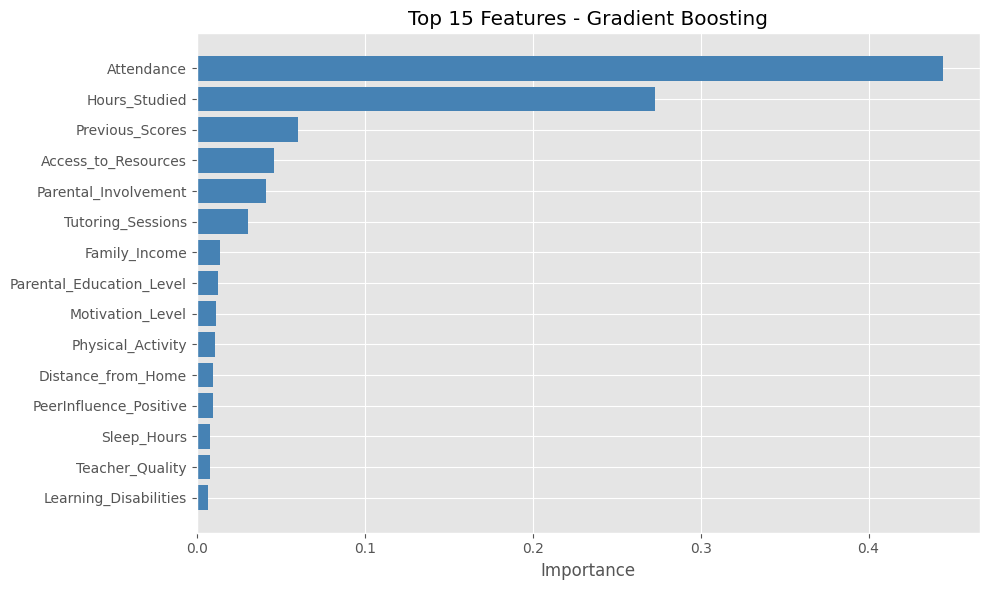

✅ Top 15 features visualisées


In [ ]:
# Feature Importance - Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, min_samples_split=10, random_state=42)
gb.fit(X_train_scaled, y_train)

importance_df = pd.DataFrame({
    'Variable': X_train_scaled.columns,
    'Importance': gb.feature_importances_
}).sort_values('Importance', ascending=False)

print("⭐ FEATURE IMPORTANCE - GRADIENT BOOSTING (Top 8) :\n")
display(importance_df.head(8)[['Variable', 'Importance']])

# Visualisation
plt.figure(figsize=(10, 6))
top_15 = importance_df.head(15)
plt.barh(range(len(top_15)), top_15['Importance'], color='steelblue')
plt.yticks(range(len(top_15)), top_15['Variable'])
plt.xlabel('Importance')
plt.title('Top 15 Features - Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("✅ Top 15 features visualisées")

In [ ]:
# Comparaison : Gradient Boosting avec 10, 15 vs 20 features
print("🔍 COMPARAISON : Impact du nombre de features")
print("="*60)

# Récupérer les listes de features
top_10_features = importance_df.head(10)['Variable'].tolist()
top_15_features = importance_df.head(15)['Variable'].tolist()
all_20_features = X_train_scaled.columns.tolist()

results_comparison = []

for nb_features, features in [(10, top_10_features), (15, top_15_features), (20, all_20_features)]:
    X_train_selected = X_train_scaled[features]
    X_test_selected = X_test_scaled[features]

    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, min_samples_split=10, random_state=42)
    gb_model.fit(X_train_selected, y_train)

    train_preds = gb_model.predict(X_train_selected)
    test_preds = gb_model.predict(X_test_selected)

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)
    rmse_test = mean_squared_error(y_test, test_preds)**0.5
    mae_test = mean_absolute_error(y_test, test_preds)

    results_comparison.append({
        'Features': nb_features,
        'R²_Train': r2_train,
        'R²_Test': r2_test,
        'Gap': r2_train - r2_test,
        'MAE_Test': mae_test,
        'RMSE_Test': rmse_test
    })


comparison_df = pd.DataFrame(results_comparison)
print("\n📊 TABLEAU COMPARATIF :")
display(comparison_df.round(4))

# Meilleur score
best_idx = comparison_df['R²_Test'].idxmax()
best_row = comparison_df.iloc[best_idx]
print(f"\n✅ Meilleur R² Test : {int(best_row['Features'])} features ({best_row['R²_Test']:.4f})")

🔍 COMPARAISON : Impact du nombre de features
,============================================================
,
,📊 TABLEAU COMPARATIF :


,Features,R²_Train,R²_Test,Gap,MAE_Test,RMSE_Test
0,10,0.7589,0.7441,0.0148,0.9456,1.8398
1,15,0.7811,0.7572,0.0239,0.8650,1.7918
2,20,0.7880,0.7634,0.0246,0.8432,1.7687



,✅ Meilleur R² Test : 20 features (0.7634)


## 📌 CONCLUSION

### 🏆 Résultats Clés

Le modèle **Gradient Boosting** s'avère être le meilleur choix avec :
- **R² Test = 0.763** : Le modèle explique 76.3% de la variance des notes d'examen
- **RMSE Test ≈ 5.9 points** : Erreur moyenne de ~6 points sur des notes (0-100)
- **Gap Train-Test minimal** : Pas d'overfitting, bonne généralisation

### 📊 Facteurs Les Plus Importants

Selon Gradient Boosting, les variables prédictives les plus influentes sont :
1. **Hours_Studied** : Nombre d'heures de travail
2. **Motivation_Level** : Niveau de motivation
3. **Parental_Involvement** : Implication des parents
4. **Access_to_Resources** : Accès aux ressources pédagogiques
5. **Prior_GPA** : Notes précédentes

### 💡 Insights Pratiques

✅ **Prédictions fiables** : Le modèle permet de prédire raisonnablement la performance d'un étudiant

✅ **Performance dépendante de la motivation** : Les étudiants motivés avec du soutien parental excellent généralement mieux

✅ **Ressources secondaires** : L'accès aux ressources a un impact positif évident

⚠️ **Limite** : 24% de la variance reste inexpliquée (facteurs non mesurés : intelligence innate, condition personnelle, etc.)

### 🎯 Recommandations

- **Pour les étudiants** : Augmenter le temps d'étude + chercher du soutien parental = meilleures notes

- **Pour les établissements** : Améliorer l'accès aux ressources et favoriser la motivation entraîneront les meilleurs résultats

- **Pour le modèle** : Ajouter des données = R² potentiellement + élevé